In [1]:
import numpy as np
import matplotlib.pyplot as plt


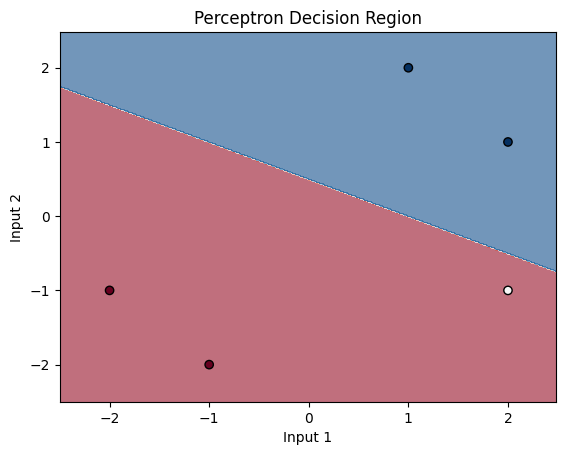

In [6]:
class Perceptron:
    def __init__(self, num_inputs):
        self.weights = np.zeros(num_inputs)
        self.bias = 0

    def predict(self, input):
        activation = np.dot(self.weights, input) + self.bias
        return 1 if activation >= 0 else -1

    def train(self, inputs, labels, learning_rate=0.1, num_epochs=10):
        for epoch in range(num_epochs):
            for input, label in zip(inputs, labels):
                prediction = self.predict(input)
                if prediction != label:
                    self.weights += learning_rate * label * input
                    self.bias += learning_rate * label

    def plot_decision_region(self, inputs, labels):
        x_min, x_max = inputs[:, 0].min() - 0.5, inputs[:, 0].max() + 0.5
        y_min, y_max = inputs[:, 1].min() - 0.5, inputs[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))
        Z = np.array([self.predict([x1, x2]) for x1, x2 in np.c_[xx.ravel(), yy.ravel()]])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
        plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, cmap=plt.cm.RdBu, edgecolors='black')

inputs = np.array([[1, 2], [2, 1], [-1, -2], [-2, -1]])
labels = np.array([1, 1, -1, -1])

perceptron = Perceptron(2)

perceptron.train(inputs, labels)
perceptron.plot_decision_region(inputs, labels)
plt.title("Perceptron Decision Region")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()
 